10000


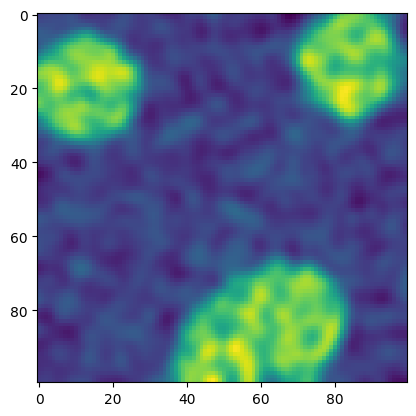

threshold:  0.7308385988567889


In [68]:
from pathlib import Path
import numpy as np
from matplotlib import pyplot as plt
from skimage.data import binary_blobs
import skimage.measure
import bfio
from scipy import ndimage as ndi
from skimage.filters import threshold_otsu

DATA_DIR = Path("tmp")

img_dim = (100, 100)
assert img_dim[0] == img_dim[1]
img_size = np.prod(img_dim)

print(img_size)

template = np.random.rand(*img_dim)

def generate_blobs(size: int):
    mask = binary_blobs(
            n_dim= 2,
            length=size,
            blob_size_fraction=0.5,
            volume_fraction=0.25,
            rng=10
        )
    return mask

def save_2D_image(img, out_path):
    with bfio.BioWriter(out_path) as writer:
        (y, x) = img.shape
        writer.Y = y
        writer.X = x
        writer.dtype = img.dtype
        writer[:] = img[:]

mask = generate_blobs(img_dim[0])
blobs_1, num_features_1 = ndi.label(mask)
blobs_2, num_features_2 = skimage.measure.label(mask, return_num=True)

assert np.array_equal(blobs_1,blobs_2)
assert np.array_equal(num_features_1,num_features_2)

img = template  + template * mask
img = ndi.gaussian_filter(img, sigma=2)
plt.imshow(img)
plt.show()

save_2D_image(img, DATA_DIR / "test_image.tif")

def test_label(img):
    rois, num_rois = ndi.label(img)
    assert (num_rois == num_features_1), f"{num_rois}, expect: {num_features_1}"

threshold = threshold_otsu(img)


img = img > threshold
test_label(img)